<a href="https://colab.research.google.com/github/moreirarodrigo-eo/Project_NSF/blob/main/Data_analysis_FIRE_data_for_lots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install geopandas -q
import geopandas as gpd
!pip install contextily -q
import contextily as ctx
!pip install pysal -q
import xyzservices.providers as xyz
import libpysal
import mapclassify
import matplotlib.pyplot as plt
import seaborn as sns

# **Geodataframes**

In [98]:
gdf_all = gpd.read_file('/content/drive/MyDrive/PROJETOS/Project_NCF_burn_exports/Data_to_share_CSV_SHP_Read-me/Burned_area_in_ha_Dummy_per_lot_ALL_LOTS.gpkg').to_crs(epsg=4326)
gdf_surveyed_lots = gpd.read_file('/content/drive/MyDrive/PROJETOS/Project_NCF_burn_exports/Data_to_share_CSV_SHP_Read-me/Burned_area_per_lot_SURVEYED_lots.gpkg').to_crs(epsg=4326)
gdf_RO = gpd.read_file('/content/drive/MyDrive/PROJETOS/Project_US/EMATER_data/RO/11UFE250GC_SIR.shp').to_crs(epsg=4326)

In [ ]:
gdf_all.columns.tolist()

In [99]:
# Assuming your DataFrame is named df
columns_to_divide = ['AUG_2019_area', 'AUG_2020_area', 'AUG_2021_area',
                     'JUL_2019_area', 'JUL_2020_area', 'JUL_2021_area',
                     'SEP_2019_area', 'SEP_2020_area', 'SEP_2021_area',
                     'Total_area']

# Divide the specified columns by 'Shape_Area'
# Add new columns with suffix "_area_percent"
for column in columns_to_divide:
    new_column_name = f"{column}_percent"
    gdf_all[new_column_name] = gdf_all[column] / gdf_all['Shape_Area'] * 100
gdf_all

LotID  Interview  LotIDCorre     LotID_fin         responseid  \
0        70039          1      700390  3.002880e+10  R_6VjZ6u5uqzVL5C4   
1        70039          0      700391  3.002882e+10                NaN   
2        70039          1      700390  3.002880e+10  R_6VjZ6u5uqzVL5C4   
3        70039          0      700391  3.002882e+10                NaN   
4        70040          2      700400  3.002880e+10  R_bn5JUGwAsorFA5j   
...        ...        ...         ...           ...                ...   
24241  1504771          0           0  1.014010e+10                NaN   
24242  1506571          0           0  1.014011e+10                NaN   
24243  1507301          0           0  1.014011e+10                NaN   
24244  1406781          0           0  1.006011e+10                NaN   
24245  1500291          0           0  1.014012e+10                NaN   

        Shape_Leng     Shape_Area  AUG_2019_area  AUG_2020_area  \
0      4472.852462  491009.339201            NaN            NaN   
1      4470.047786  487498.989947            NaN            NaN   
2      4472.852462  491009.339201            NaN            NaN   
3      4470.047786  487498.989947            NaN            NaN   
4      3968.138900  522020.643740            NaN            NaN   
...            ...            ...            ...            ...   
24241  4673.712748  558662.500477            NaN            NaN   
24242  3246.046772  411489.228163            NaN            NaN   
24243  5219.486665  292494.317351            NaN            NaN   
24244  5243.801922  472363.242614            NaN            NaN   
24245  5418.497052  580083.765482            NaN            NaN   

       AUG_2021_area  ...  AUG_2019_area_percent  AUG_2020_area_percent  \
0                NaN  ...                    NaN                    NaN   
1                NaN  ...                    NaN                    NaN   
2                NaN  ...                    NaN                    NaN   
3                NaN  ...                    NaN                    NaN   
4                NaN  ...                    NaN                    NaN   
...              ...  ...                    ...                    ...   
24241            NaN  ...                    NaN                    NaN   
24242            NaN  ...                    NaN                    NaN   
24243            NaN  ...                    NaN                    NaN   
24244            NaN  ...                    NaN                    NaN   
24245            NaN  ...                    NaN                    NaN   

       AUG_2021_area_percent  JUL_2019_area_percent  JUL_2020_area_percent  \
0                        NaN                    NaN                    NaN   
1                        NaN                    NaN                    NaN   
2                        NaN                    NaN                    NaN   
3                        NaN                    NaN                    NaN   
4                        NaN                    NaN                    NaN   
...                      ...                    ...                    ...   
24241                    NaN                    NaN                    NaN   
24242                    NaN                    NaN                    NaN   
24243                    NaN                    NaN                    NaN   
24244                    NaN                    NaN                    NaN   
24245                    NaN                    NaN                    NaN   

       JUL_2021_area_percent  SEP_2019_area_percent  SEP_2020_area_percent  \
0                        NaN                    NaN                    NaN   
1                        NaN                    NaN                    NaN   
2                        NaN                    NaN                    NaN   
3                        NaN                    NaN                    NaN   
4                        NaN                    NaN                    NaN   
...      

In [100]:
gdf_all.LotID_fin = gdf_all.LotID_fin.astype('int')

In [101]:
gdf_all

LotID  Interview  LotIDCorre    LotID_fin         responseid  \
0        70039          1      700390  30028800400  R_6VjZ6u5uqzVL5C4   
1        70039          0      700391  30028816980                NaN   
2        70039          1      700390  30028800400  R_6VjZ6u5uqzVL5C4   
3        70039          0      700391  30028816980                NaN   
4        70040          2      700400  30028800410  R_bn5JUGwAsorFA5j   
...        ...        ...         ...          ...                ...   
24241  1504771          0           0  10140104381                NaN   
24242  1506571          0           0  10140105871                NaN   
24243  1507301          0           0  10140106541                NaN   
24244  1406781          0           0  10060106101                NaN   
24245  1500291          0           0  10140119260                NaN   

        Shape_Leng     Shape_Area  AUG_2019_area  AUG_2020_area  \
0      4472.852462  491009.339201            NaN            NaN   
1      4470.047786  487498.989947            NaN            NaN   
2      4472.852462  491009.339201            NaN            NaN   
3      4470.047786  487498.989947            NaN            NaN   
4      3968.138900  522020.643740            NaN            NaN   
...            ...            ...            ...            ...   
24241  4673.712748  558662.500477            NaN            NaN   
24242  3246.046772  411489.228163            NaN            NaN   
24243  5219.486665  292494.317351            NaN            NaN   
24244  5243.801922  472363.242614            NaN            NaN   
24245  5418.497052  580083.765482            NaN            NaN   

       AUG_2021_area  ...  AUG_2019_area_percent  AUG_2020_area_percent  \
0                NaN  ...                    NaN                    NaN   
1                NaN  ...                    NaN                    NaN   
2                NaN  ...                    NaN                    NaN   
3                NaN  ...                    NaN                    NaN   
4                NaN  ...                    NaN                    NaN   
...              ...  ...                    ...                    ...   
24241            NaN  ...                    NaN                    NaN   
24242            NaN  ...                    NaN                    NaN   
24243            NaN  ...                    NaN                    NaN   
24244            NaN  ...                    NaN                    NaN   
24245            NaN  ...                    NaN                    NaN   

       AUG_2021_area_percent  JUL_2019_area_percent  JUL_2020_area_percent  \
0                        NaN                    NaN                    NaN   
1                        NaN                    NaN                    NaN   
2                        NaN                    NaN                    NaN   
3                        NaN                    NaN                    NaN   
4                        NaN                    NaN                    NaN   
...                      ...                    ...                    ...   
24241                    NaN                    NaN                    NaN   
24242                    NaN                    NaN                    NaN   
24243                    NaN                    NaN                    NaN   
24244                    NaN                    NaN                    NaN   
24245                    NaN                    NaN                    NaN   

       JUL_2021_area_percent  SEP_2019_area_percent  SEP_2020_area_percent  \
0                        NaN                    NaN                    NaN   
1                        NaN                    NaN                    NaN   
2                        NaN                    NaN                    NaN   
3                        NaN                    NaN                    NaN   
4                        NaN                    NaN                    NaN   
...                  

In [ ]:
# gdf_all.to_file('/content/drive/MyDrive/PROJETOS/Project_NCF_burn_exports/Data_to_share_CSV_SHP_Read-me/Burned_area_in_ha_Dummy_percentage_burned_per_lot_ALL_LOTS.gpkg')
# gdf_all.to_csv('/content/drive/MyDrive/PROJETOS/Project_NCF_burn_exports/Data_to_share_CSV_SHP_Read-me/Burned_area_in_ha_Dummy_percentage_burned_per_lot_ALL_LOTS.gpkg')

In [77]:
df_slope = pd.read_csv('/content/drive/MyDrive/PROJETOS/Jime_data/Slope_variables_2019_lots.csv')
df_slope

ID  FREQUENCY  MEAN_slope  MIN_slope  MAX_slope  RANGE_slope  \
0     10002300420        502        3.39          0         12           12   
1     10002300640        521        3.80          0         15           15   
2     10002300720        534        4.54          0         14           14   
3     10002302400        311        3.83          0         14           14   
4     10002302570        396       12.07          0         29           29   
...           ...        ...         ...        ...        ...          ...   
1338  30148407770         59        3.07          0         10           10   
1339  30148407800        142        3.27          0         11           11   
1340  30148407810         52        2.94          0          8            8   
1341  30148407820         41        2.85          0          7            7   
1342  30148407840         82        3.41          0          9            9   

      STD_slope  VARIANCE_slope  
0          2.24            5.03  
1          3.21           10.33  
2          3.16           10.02  
3          3.19           10.18  
4          6.48           41.93  
...         ...             ...  
1338       2.30            5.31  
1339       2.50            6.25  
1340       1.76            3.11  
1341       1.67            2.78  
1342       2.22            4.94  

[1343 rows x 8 columns]

In [102]:
gdf_surveyed = gdf_all[gdf_all['LotID_fin'].isin(df_slope['ID'])]
gdf_surveyed = gdf_surveyed.drop_duplicates(keep='first')
gdf_surveyed

LotID  Interview  LotIDCorre    LotID_fin         responseid  \
0        70039          1      700390  30028800400  R_6VjZ6u5uqzVL5C4   
4        70040          2      700400  30028800410  R_bn5JUGwAsorFA5j   
8        70048          1      700480  30028800490  R_9t9CoDDomhP2Mnh   
9        70085          2      700850  30028800850  R_mlhGs35Qi3QqSOj   
10       70089          1      700890  30028800880  R_2F4HJfRHQ6wMRSs   
...        ...        ...         ...          ...                ...   
23079  1405040          3           0  10060113090  R_jWvnMVxhJHWFkGd   
23080  1501770          2           0  10140119180  R_7tinpglSV2eeZZX   
23081  1506500          3           0  10140119210  R_oi0TdqFLUYHerkx   
23082  1508640          3           0  10140119240  R_5vbUlnj8MXTqQ1u   
23083  1509720          3           0  10140119250  R_nVmOVDBlUekV0m1   

        Shape_Leng    Shape_Area  AUG_2019_area  AUG_2020_area  AUG_2021_area  \
0      4472.852462  4.910093e+05            NaN            NaN            NaN   
4      3968.138900  5.220206e+05            NaN            NaN            NaN   
8      4939.581286  9.655920e+05            NaN            NaN            NaN   
9      6047.022054  2.028331e+06            NaN            NaN            NaN   
10     4958.625546  9.815222e+05            NaN            NaN            NaN   
...            ...           ...            ...            ...            ...   
23079  5158.509742  1.627814e+06            NaN            NaN            NaN   
23080  6270.150796  2.275165e+06            NaN            NaN            NaN   
23081  5331.647782  4.755368e+05       3.976861            NaN            NaN   
23082  2654.776896  1.722836e+05            NaN            NaN            NaN   
23083  1354.972370  1.133197e+05            NaN            NaN            NaN   

       ...  AUG_2019_area_percent  AUG_2020_area_percent  \
0      ...                    NaN                    NaN   
4      ...                    NaN                    NaN   
8      ...                    NaN                    NaN   
9      ...                    NaN                    NaN   
10     ...                    NaN                    NaN   
...    ...                    ...                    ...   
23079  ...                    NaN                    NaN   
23080  ...                    NaN                    NaN   
23081  ...               0.000836                    NaN   
23082  ...                    NaN                    NaN   
23083  ...                    NaN                    NaN   

       AUG_2021_area_percent  JUL_2019_area_percent  JUL_2020_area_percent  \
0                        NaN                    NaN                    NaN   
4                        NaN                    NaN                    NaN   
8                        NaN                    NaN                    NaN   
9                        NaN                    NaN                    NaN   
10                       NaN                    NaN                    NaN   
...                      ...                    ...                    ...   
23079                    NaN                    NaN                    NaN   
23080                    NaN                    NaN                    NaN   
23081                    NaN                    NaN                    NaN   
23082                    NaN                    NaN                    NaN   
23083                    NaN                    NaN                    NaN   

       JUL_2021_area_percent  SEP_2019_area_percent  SEP_2020_area_percent  \
0                        NaN                    NaN                    NaN   
4                        NaN                    NaN                    NaN   
8                        NaN                    NaN                    NaN   
9                        NaN                    NaN                    NaN   
10                       NaN                    NaN                    NaN   
...                      ...     

In [103]:
gdf_surveyed.to_file('/content/drive/MyDrive/PROJETOS/Project_NCF_burn_exports/Data_to_share_CSV_SHP_Read-me/Burned_area_in_ha_Dummy_percentage_burned_per_lot_SURVEYED_LOTS.gpkg')
gdf_surveyed.to_csv('/content/drive/MyDrive/PROJETOS/Project_NCF_burn_exports/Data_to_share_CSV_SHP_Read-me/Burned_area_in_ha_Dummy_percentage_burned_per_lot_SURVEYED_LOTS.cvs')

In [ ]:
gdf_all.head(100)

# **Plot the spatial distribution**

In [81]:
import plotly.express as px
from shapely.geometry import Polygon
gdf_surveyed = gpd.read_file('/content/drive/MyDrive/PROJETOS/Project_NCF_burn_exports/Data_to_share_CSV_SHP_Read-me/Burned_area_in_ha_Dummy_percentage_burned_per_lot_SURVEYED_LOTS.gpkg')

gdf= gdf_surveyed

# geometry = gdf.geometry.iloc[0]
# # Get the centroid of the geometry
# centroid = geometry.centroid
# # Get the centroid latitude and longitude
# centroid_lat = centroid.y
# centroid_lon = centroid.x

month = 'SEP_'
year = '2019_area_percent'
gdf[month+year] = gdf[month+year].astype(float)
# Create the choropleth map
fig = px.choropleth_mapbox(
    gdf,
    geojson=gdf.geometry,
    locations=gdf.index,
    color=month + year,
    hover_name='LotID',
    hover_data=[month + year],
    zoom =2,
    height = 900
)

fig.update_layout(mapbox_style="open-street-map")

# fig.update_geos(center={'lon': centroid_lon, 'lat': centroid_lat})
fig.update_layout(mapbox_bounds={
    "west": -66.897454,
    "east": -58.383685,
    "south": -13.715951,
    "north": -8.670523,
})

# Add interactivity to the map
fig.update_layout(
    title='Burned area per lot',
    #margin=dict(l=0, r=0, t=25, b=25),
)

# Show the map
fig.show()

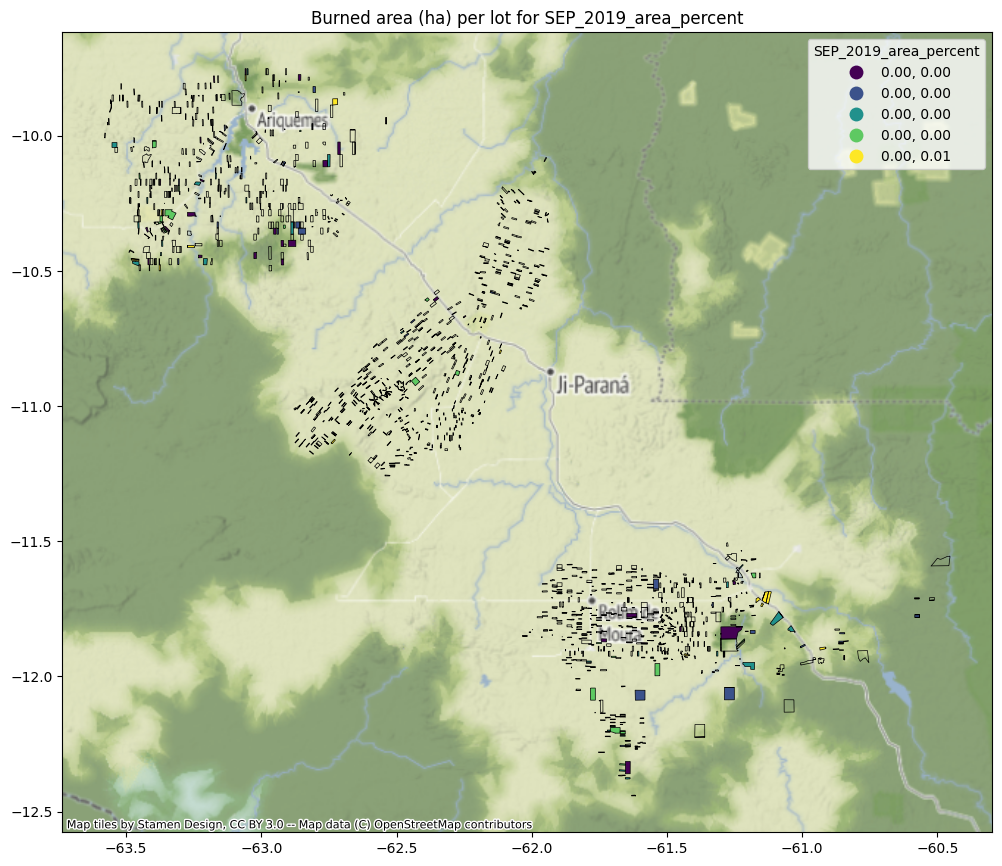

In [82]:
month = 'SEP_'
year = '2019_area_percent'
gdf[month+year] = gdf[month+year].astype(float)

n_bins = 5

ax = gdf.plot(column=month+year, scheme="Quantiles", k=n_bins, figsize=(12, 12), markersize=0.7, legend=True)
#gdf_RO.boundary.plot(ax=ax, color="black", linewidth=1)
gdf_surveyed_lots.boundary.plot(ax=ax, color="black", linewidth=0.5)
ctx.add_basemap(ax, crs=gdf.crs.to_string())
legend = ax.get_legend()
legend.set_title(month+year)
plt.title("Burned area (ha) per lot for "+ month+year)
plt.show()

# **Visualize the distribution of the data for the surveyed lots**

In [124]:
gdf_surveyed_lots = gpd.read_file('/content/drive/MyDrive/PROJETOS/Project_NCF_burn_exports/Data_to_share_CSV_SHP_Read-me/Burned_area_in_ha_Dummy_percentage_burned_per_lot_SURVEYED_LOTS.gpkg')

In [ ]:
gdf = gdf_surveyed_lots
gdf = gdf.drop(columns = ['Interview',
 'LotIDCorre',
 'LotID_fin',
 'responseid'])
gdf.columns.tolist()

In [126]:
gdf.describe()

LotID    Shape_Leng    Shape_Area  AUG_2019_area  AUG_2020_area  \
count  1.282000e+03   1282.000000  1.282000e+03      32.000000       6.000000   
mean   5.746288e+05   4572.274232  1.037351e+06      17.856985       2.853803   
std    5.605456e+05   2416.474221  2.053478e+06      31.603050       4.652792   
min    7.001800e+04    411.507211  1.022656e+04       0.005304       0.038926   
25%    1.100692e+05   2995.745588  2.574017e+05       1.025895       0.164857   
50%    3.039000e+05   4530.487358  5.157262e+05       4.952073       0.494462   
75%    1.311298e+06   5416.536687  1.011268e+06      20.969561       3.328160   
max    1.518110e+06  25678.390238  3.599658e+07     134.828601      11.767255   

       AUG_2021_area  JUL_2019_area  JUL_2020_area  JUL_2021_area  \
count      19.000000      45.000000      18.000000      14.000000   
mean        4.337653       4.736854       1.625564       1.852604   
std         6.370619      15.957536       2.621877       3.072018   
min         0.014270       0.006539       0.039106       0.009772   
25%         0.252292       0.215103       0.195249       0.058664   
50%         0.479269       0.791954       0.347537       0.337925   
75%         7.740628       1.752115       1.395241       1.280850   
max        20.382151      89.842257       8.183705       8.271688   

       SEP_2019_area  ...  AUG_2019_area_percent  AUG_2020_area_percent  \
count     164.000000  ...           3.200000e+01               6.000000   
mean        6.859717  ...           1.046526e-03               0.000129   
std        18.495357  ...           1.129794e-03               0.000173   
min         0.004042  ...           5.949930e-07               0.000001   
25%         0.328388  ...           5.122190e-05               0.000016   
50%         1.038666  ...           4.530383e-04               0.000067   
75%         4.616855  ...           2.057479e-03               0.000153   
max       166.377120  ...           3.461349e-03               0.000455   

       AUG_2021_area_percent  JUL_2019_area_percent  JUL_2020_area_percent  \
count              19.000000              45.000000              18.000000   
mean                0.001046               0.000230               0.000108   
std                 0.002983               0.000420               0.000165   
min                 0.000003               0.000001               0.000002   
25%                 0.000025               0.000014               0.000015   
50%                 0.000082               0.000048               0.000065   
75%                 0.000241               0.000163               0.000103   
max                 0.012622               0.001645               0.000693   

       JUL_2021_area_percent  SEP_2019_area_percent  SEP_2020_area_percent  \
count           1.400000e+01           1.640000e+02           1.000000e+02   
mean            1.006069e-04           5.113007e-04           6.479480e-04   
std             2.145942e-04           1.016338e-03           1.755424e-03   
min             7.872011e-07           3.461812e-07           5.064086e-07   
25%             6.738635e-06           2.853021e-05           2.780606e-05   
50%             3.262384e-05           1.077016e-04           1.170767e-04   
75%             6.655777e-05           4.491678e-04           4.787933e-04   
max             8.248011e-04           6.476564e-03           1.467512e-02   

       SEP_2021_area_percent  Total_area_percent  
count           1.200000e+01        2.660000e+02  
mean            1.205566e-04        8.192440e-04  
std             2.060488e-04        1.872880e-03  
min             7.394973e-07        3.461812e-07  
25%             5.810734e-06        2.901235e-05  
50%             3.844397e-05        1.351121e-04  
75%             1.057120e-04        5.622953e-04  
max             7.202547e-04        1.707830e-02  

[8 rows x 33 columns]

# **Plotting the distribution of the data for the surveyed lots**

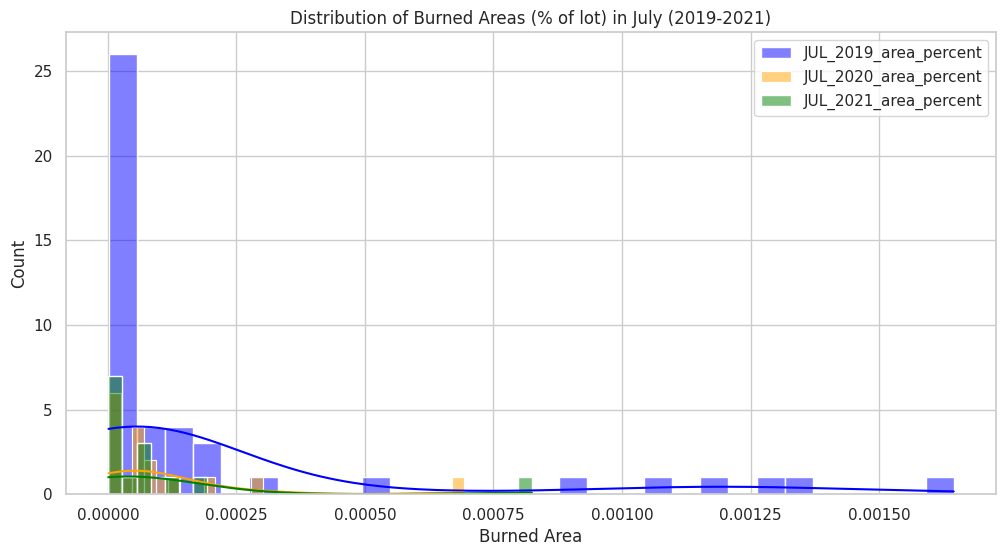

In [129]:
# filtered_gdf = gdf[
#     (gdf['AUG_2019_area_percent'] > 0) &
#     (gdf['AUG_2020_area_percent'] > 0) &
#     (gdf['AUG_2021_area_percent'] > 0)
# ]
# filtered_gdf
plt.figure(figsize=(12, 6))
sns.histplot(data=gdf, x='JUL_2019_area_percent', bins=30, kde=True, color='blue', label='JUL_2019_area_percent')
sns.histplot(data=gdf, x='JUL_2020_area_percent', bins=30, kde=True, color='orange', label='JUL_2020_area_percent')
sns.histplot(data=gdf, x='JUL_2021_area_percent', bins=30, kde=True, color='green', label='JUL_2021_area_percent')
plt.xlabel('Burned Area')
plt.title('Distribution of Burned Areas (% of lot) in July (2019-2021)')
plt.legend()
plt.show()

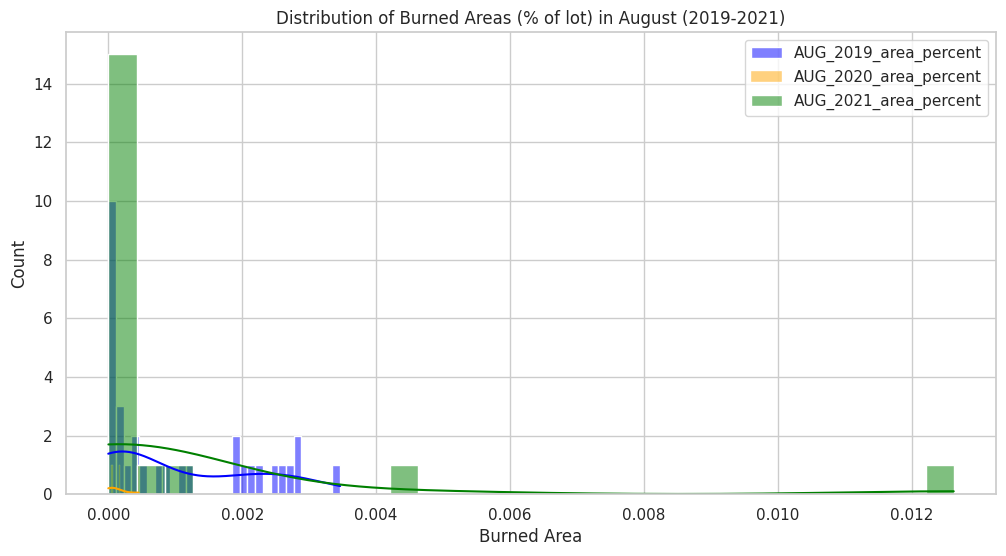

In [130]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(data=gdf, x='AUG_2019_area_percent', bins=30, kde=True, color='blue', label='AUG_2019_area_percent')
sns.histplot(data=gdf, x='AUG_2020_area_percent', bins=30, kde=True, color='orange', label='AUG_2020_area_percent')
sns.histplot(data=gdf, x='AUG_2021_area_percent', bins=30, kde=True, color='green', label='AUG_2021_area_percent')
plt.xlabel('Burned Area')
plt.title('Distribution of Burned Areas (% of lot) in August (2019-2021)')
plt.legend()
plt.show()

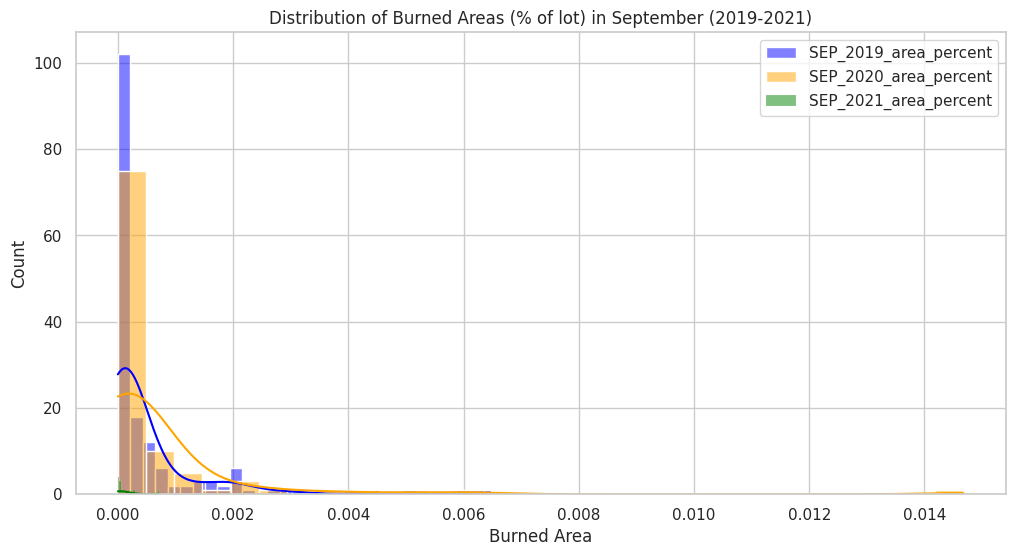

In [131]:
plt.figure(figsize=(12, 6))
sns.histplot(data=gdf, x='SEP_2019_area_percent', bins=30, kde=True, color='blue', label='SEP_2019_area_percent')
sns.histplot(data=gdf, x='SEP_2020_area_percent', bins=30, kde=True, color='orange', label='SEP_2020_area_percent')
sns.histplot(data=gdf, x='SEP_2021_area_percent', bins=30, kde=True, color='green', label='SEP_2021_area_percent')
plt.xlabel('Burned Area')
plt.title('Distribution of Burned Areas (% of lot) in September (2019-2021)')
plt.legend()
plt.show()

In [ ]:
id_vars = ['LotID', 'Shape_Leng', 'Shape_Area', 'Total_area_percent', 'geometry']
melted_df = pd.melt(gdf, id_vars=id_vars, var_name='Month_Year', value_name='Burned_Area')
melted_df = melted_df[['Total_area_percent','Month_Year']].dropna()
melted_df
columns_to_check = ['Month_Year']

# Create a condition that checks if any of the specified columns contain 'area_percent'
condition = melted_df[columns_to_check].apply(lambda x: x.str.contains('area_percent')).any(axis=1)

# Use boolean indexing to select rows that satisfy the condition
filtered_gdf = melted_df[condition]

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month_Year', y='Total_area_percent', data=filtered_gdf, palette="Set3")
plt.xticks(rotation=45)
plt.title('Boxplots of Burned Areas by Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Burned Area')
plt.show()

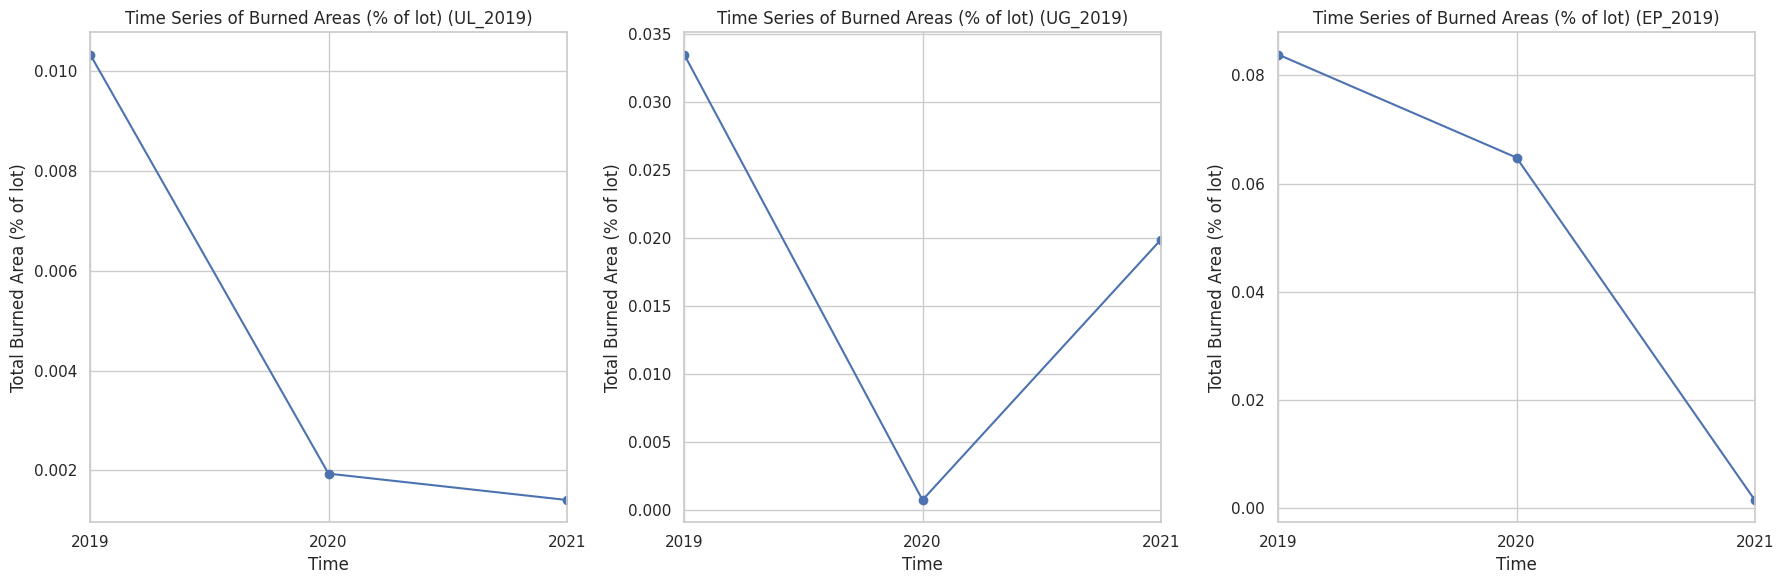

In [121]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
gdf = gdf_surveyed
gdf = gdf[['JUL_2019_area_percent', 'JUL_2020_area_percent', 'JUL_2021_area_percent',
    'AUG_2019_area_percent', 'AUG_2020_area_percent', 'AUG_2021_area_percent',
    'SEP_2019_area_percent', 'SEP_2020_area_percent', 'SEP_2021_area_percent']].rename(columns = {
        'JUL_2019_area_percent':'JUL_2019', 'JUL_2020_area_percent':'JUL_2020', 'JUL_2021_area_percent': 'JUL_2021',
    'AUG_2019_area_percent': 'AUG_2019', 'AUG_2020_area_percent': 'AUG_2020', 'AUG_2021_area_percent': 'AUG_2021',
    'SEP_2019_area_percent':'SEP_2019', 'SEP_2020_area_percent':'SEP_2020', 'SEP_2021_area_percent': 'SEP_2021'
    })
gdf
# Define the monthly columns for each plot
monthly_columns = [
    ['JUL_2019', 'JUL_2020', 'JUL_2021'],
    ['AUG_2019', 'AUG_2020', 'AUG_2021'],
    ['SEP_2019', 'SEP_2020', 'SEP_2021']
]

fig, axes = plt.subplots(nrows=1, ncols=len(monthly_columns), figsize=(18, 6))

for i, cols in enumerate(monthly_columns):
    time_series_data = gdf[cols].sum()
    time_series_data.index = pd.to_datetime(time_series_data.index, format='%b_%Y')
    ax = time_series_data.plot(ax=axes[i], marker='o')
    ax.set_title(f'Time Series of Burned Areas (% of lots) ({cols[0][-7:]})')
    ax.set_xlabel('Time')
    ax.set_ylabel('Total Burned Area (% of lots)')
    ax.grid(True)

plt.tight_layout()

plt.show()

In [ ]:
gdf_surveyed.columns.tolist

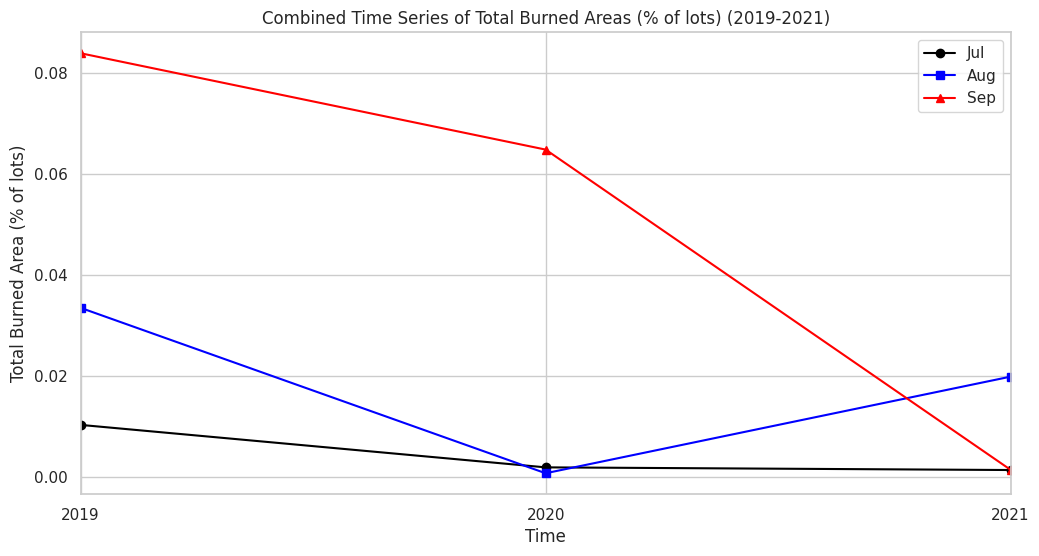

In [122]:
gdf = gdf_surveyed
gdf = gdf[['JUL_2019_area_percent', 'JUL_2020_area_percent', 'JUL_2021_area_percent',
    'AUG_2019_area_percent', 'AUG_2020_area_percent', 'AUG_2021_area_percent',
    'SEP_2019_area_percent', 'SEP_2020_area_percent', 'SEP_2021_area_percent']].rename(columns = {
        'JUL_2019_area_percent':'JUL_2019', 'JUL_2020_area_percent':'JUL_2020', 'JUL_2021_area_percent': 'JUL_2021',
    'AUG_2019_area_percent': 'AUG_2019', 'AUG_2020_area_percent': 'AUG_2020', 'AUG_2021_area_percent': 'AUG_2021',
    'SEP_2019_area_percent':'SEP_2019', 'SEP_2020_area_percent':'SEP_2020', 'SEP_2021_area_percent': 'SEP_2021'
    })
# Define the monthly columns for each plot
monthly_columns = [
    ['JUL_2019', 'JUL_2020', 'JUL_2021'],
    ['AUG_2019', 'AUG_2020', 'AUG_2021'],
    ['SEP_2019', 'SEP_2020', 'SEP_2021']
]

combined_time_series = pd.Series()
for cols in monthly_columns:
    time_series_data = gdf[cols].sum()
    time_series_data.index = pd.to_datetime(time_series_data.index, format='%b_%Y')
    combined_time_series = combined_time_series.add(time_series_data, fill_value=0)

plt.figure(figsize=(12, 6))
markers = ['o', 's', '^']
colors = ['black', 'blue', 'red']
for i, cols in enumerate(monthly_columns):
    time_series_data = gdf[cols].sum()
    time_series_data.index = pd.to_datetime(time_series_data.index, format='%b_%Y')
    month = time_series_data.index[0].strftime('%b')  # Extract the month
    time_series_data.plot(marker=markers[i], label=month, linestyle='-', color=colors[i])

plt.title('Combined Time Series of Total Burned Areas (% of lots) (2019-2021)')
plt.xlabel('Time')
plt.ylabel('Total Burned Area (% of lots)')
plt.legend()
plt.grid(True)

plt.show()

#**VIsualizing the spatial distribution for the surveyed lots**

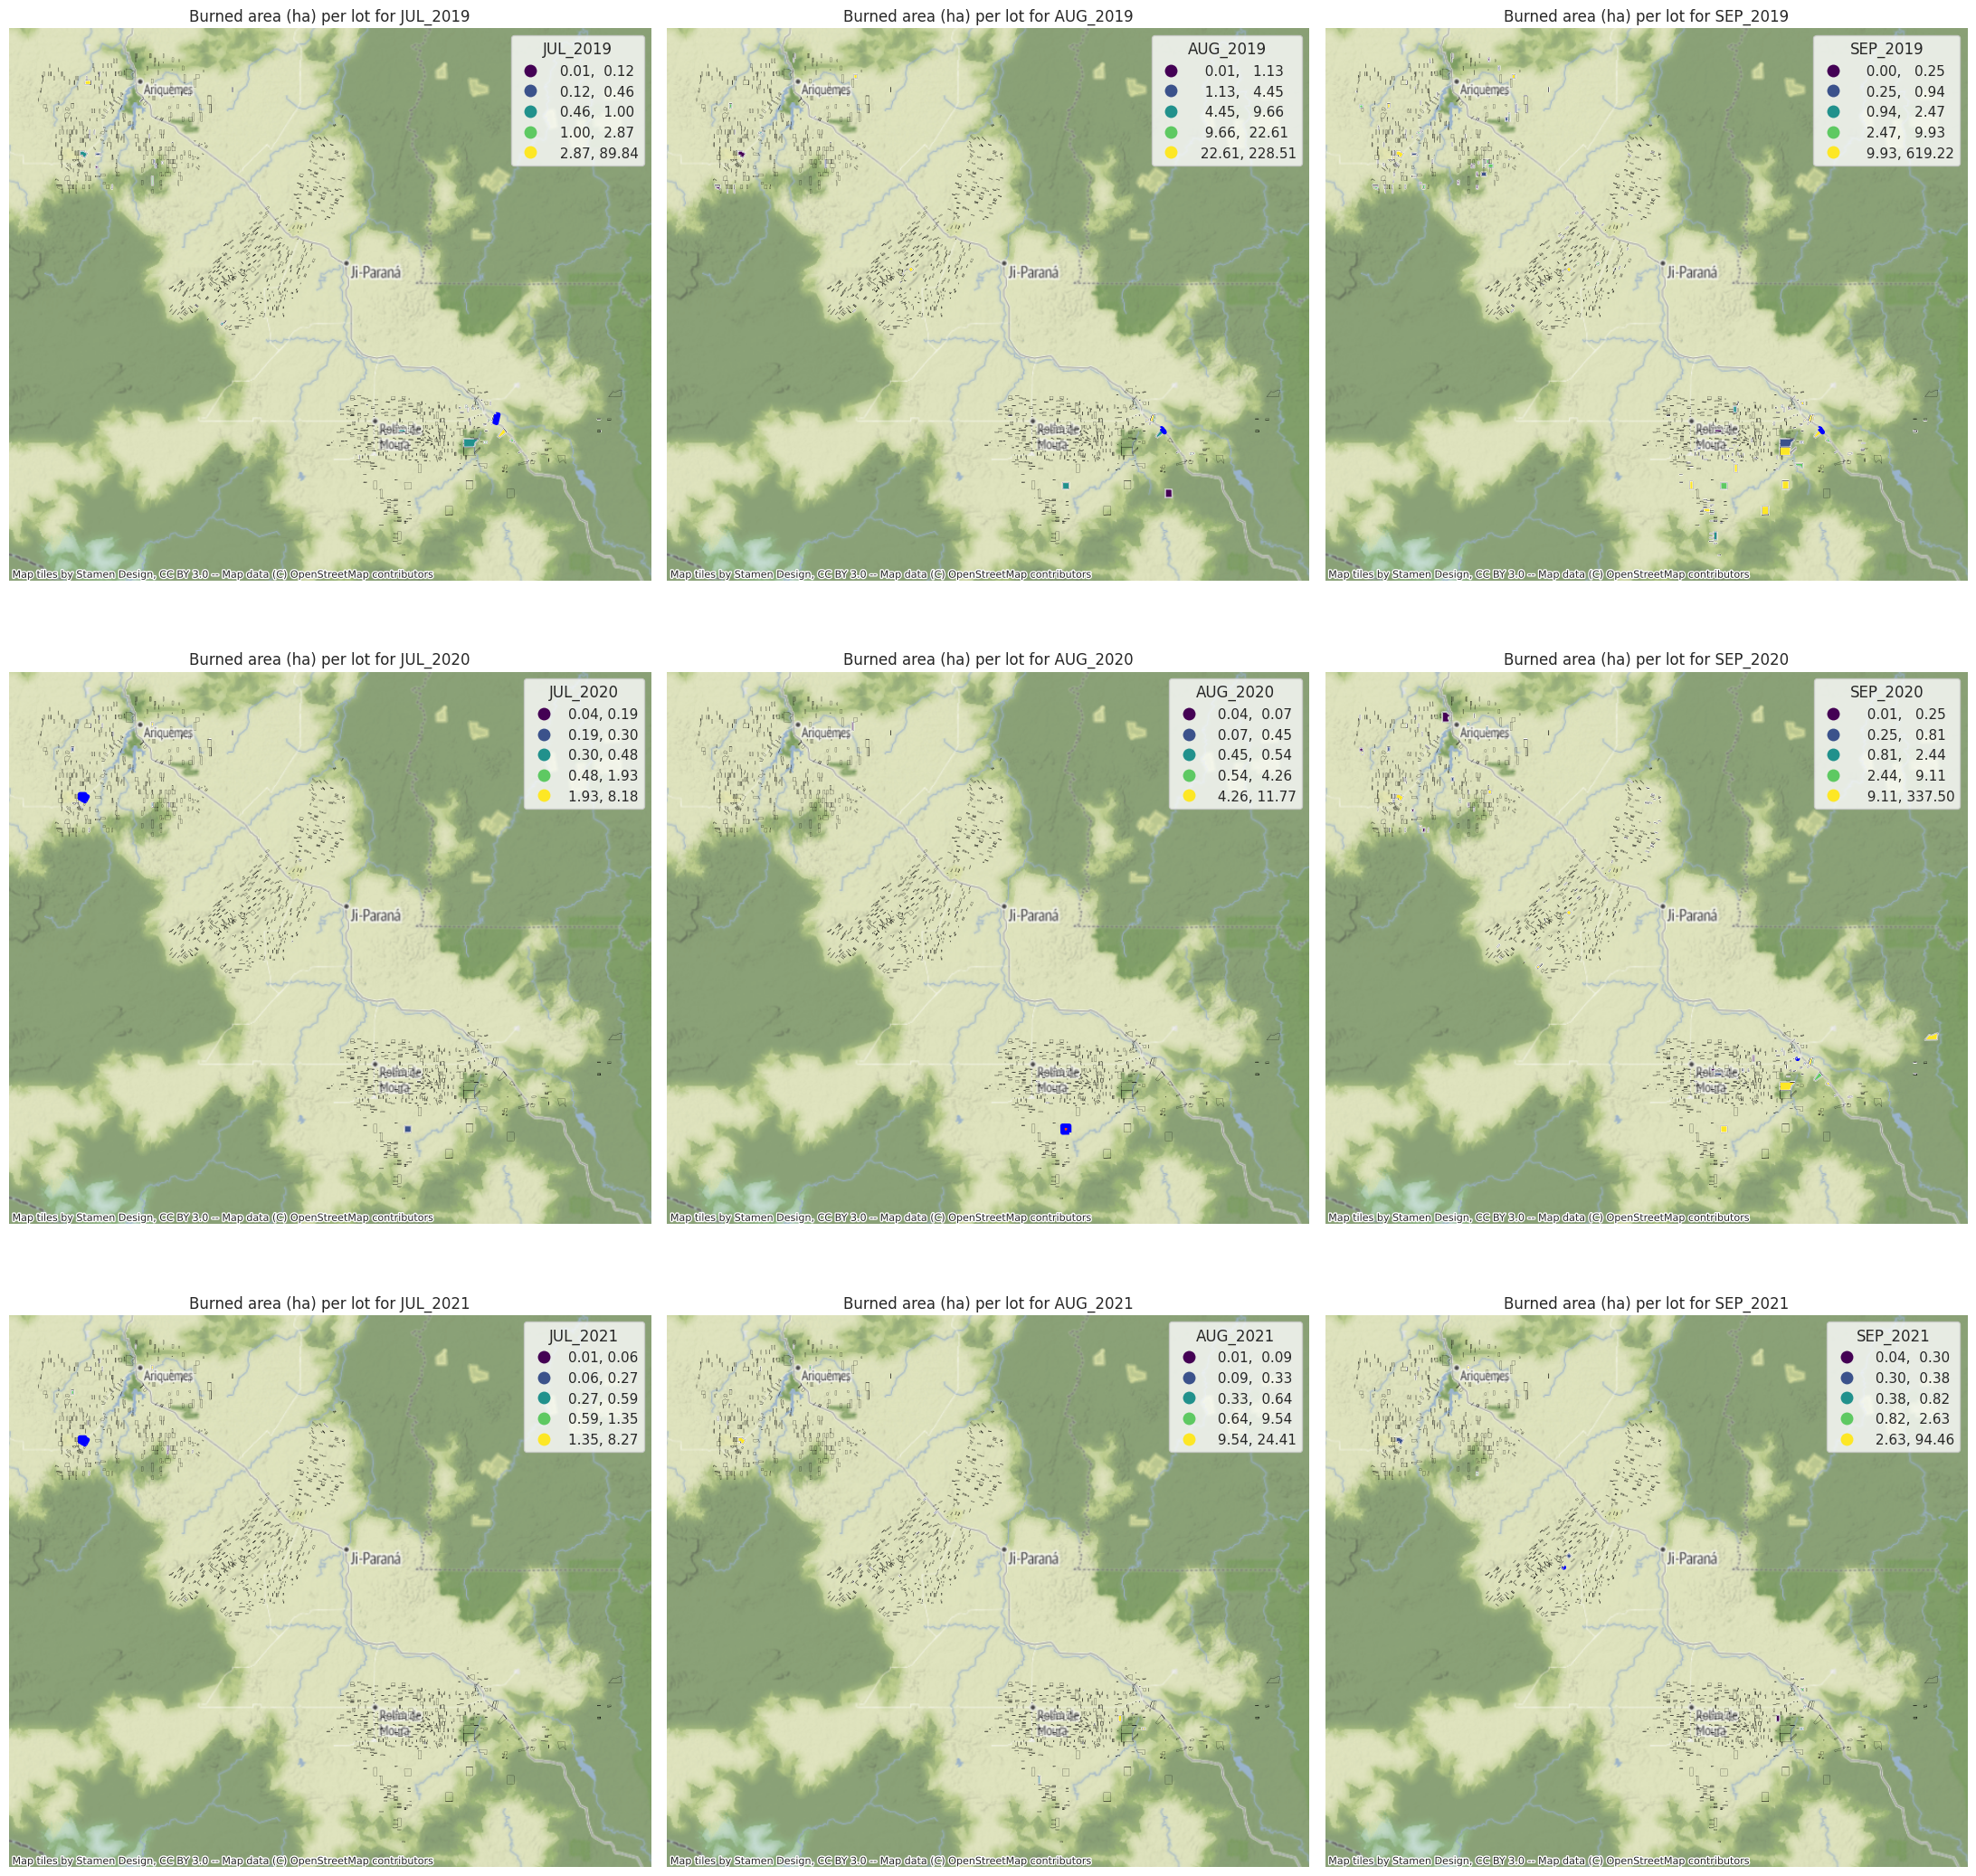

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

monthly_columns = ['JUL_2019', 'AUG_2019', 'SEP_2019', 'JUL_2020', 'AUG_2020', 'SEP_2020', 'JUL_2021', 'AUG_2021', 'SEP_2021']

n_bins = 5

fig, axs = plt.subplots(3, 3, figsize=(22, 22))
fig.subplots_adjust(wspace=0.1, hspace=0.1)

for i, month_year in enumerate(monthly_columns):
    # Find the lot with the maximum burned area for the current month_year
    max_lot_idx = gdf[month_year].idxmax()
    max_burned_lot = gdf.loc[max_lot_idx]

    # Plot the GeoDataFrame as before
    ax = axs[i // 3, i % 3]
    gdf.plot(column=month_year, scheme="Quantiles", k=n_bins, ax=ax, markersize=0.7, legend=True)
    gdf_surveyed_lots.boundary.plot(ax=ax, color="black", linewidth=0.15)

    # Create a GeoDataFrame containing only the maximum burned lot
    max_burned_gdf = gpd.GeoDataFrame([max_burned_lot], crs=gdf.crs)

    # Plot the maximum burned lot with a red color and its boundary with a blue color
    max_burned_gdf.plot(ax=ax, color="red", alpha=0.7, markersize=100)
    max_burned_gdf.boundary.plot(ax=ax, color='blue', linewidth=3.5)

    # Add a basemap using contextily
    ctx.add_basemap(ax, crs=gdf.crs.to_string())
    # ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
    # ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.USGS.USImagery)

    legend = ax.get_legend()
    legend.set_title(month_year)
    ax.set_title("Burned area (ha) per lot for " + month_year)
    ax.axis('off')

plt.tight_layout()
plt.show()


#**In case we want to see each month**

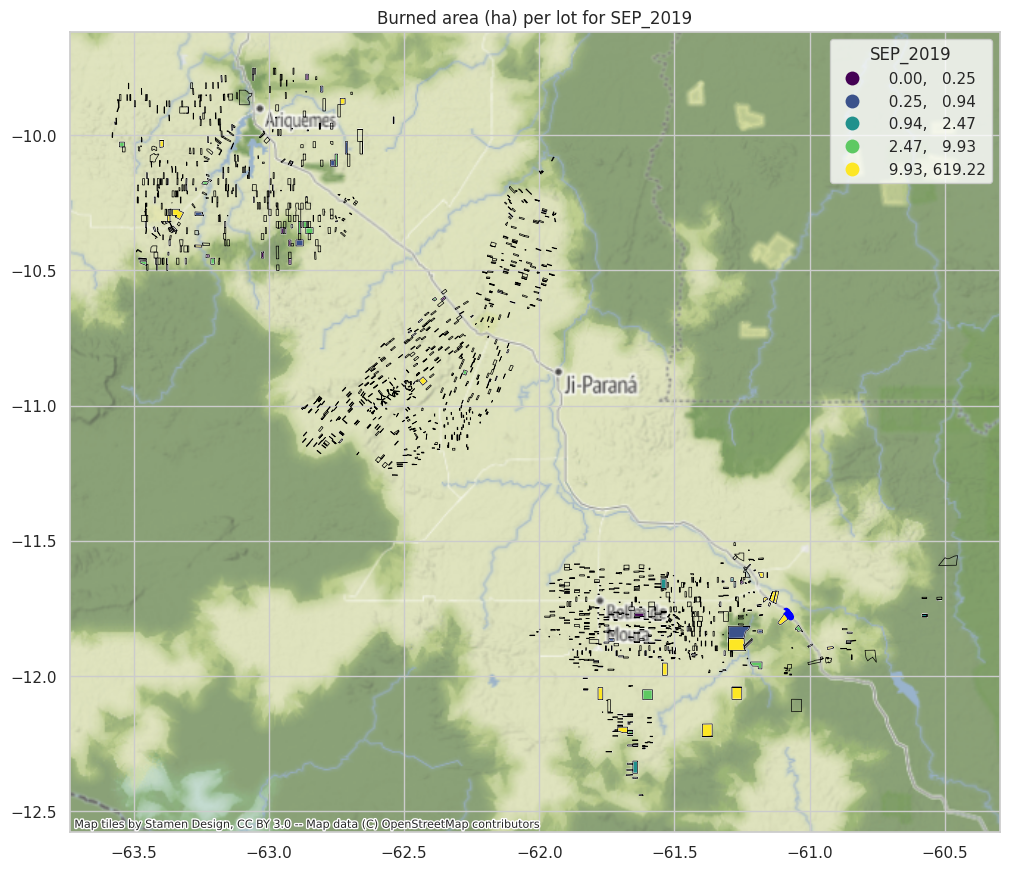

In [ ]:
n_bins = 5

# Find the lot with the maximum burned area for SEP_2019
max_lot_idx = gdf['SEP_2019'].idxmax()
max_burned_lot = gdf.loc[max_lot_idx]

# Plot the GeoDataFrame as before
ax = gdf.plot(column=month + year, scheme="Quantiles", k=n_bins, figsize=(12, 12), markersize=0.7, legend=True)
gdf_surveyed_lots.boundary.plot(ax=ax, color="black", linewidth=0.5)

# Create a GeoDataFrame containing only the maximum burned lot
max_burned_gdf = gpd.GeoDataFrame([max_burned_lot], crs=gdf.crs)

# Plot the maximum burned lot with a red color and its boundary with a blue color
max_burned_gdf.plot(ax=ax, color="red", alpha=0.7, markersize=100)
max_burned_gdf.boundary.plot(ax=ax, color='blue', linewidth=5)

# Add a basemap using contextily
ctx.add_basemap(ax, crs=gdf.crs.to_string())

legend = ax.get_legend()
legend.set_title(month + year)
plt.title("Burned area (ha) per lot for " + month + year)
plt.show()

#**In case we do not want a background**

<ipython-input-126-a2205586a152>:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-126-a2205586a152>:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-126-a2205586a152>:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-126-a2205586a152>:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-126-a2205586a152>:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-126-a2205586a152>:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future versi

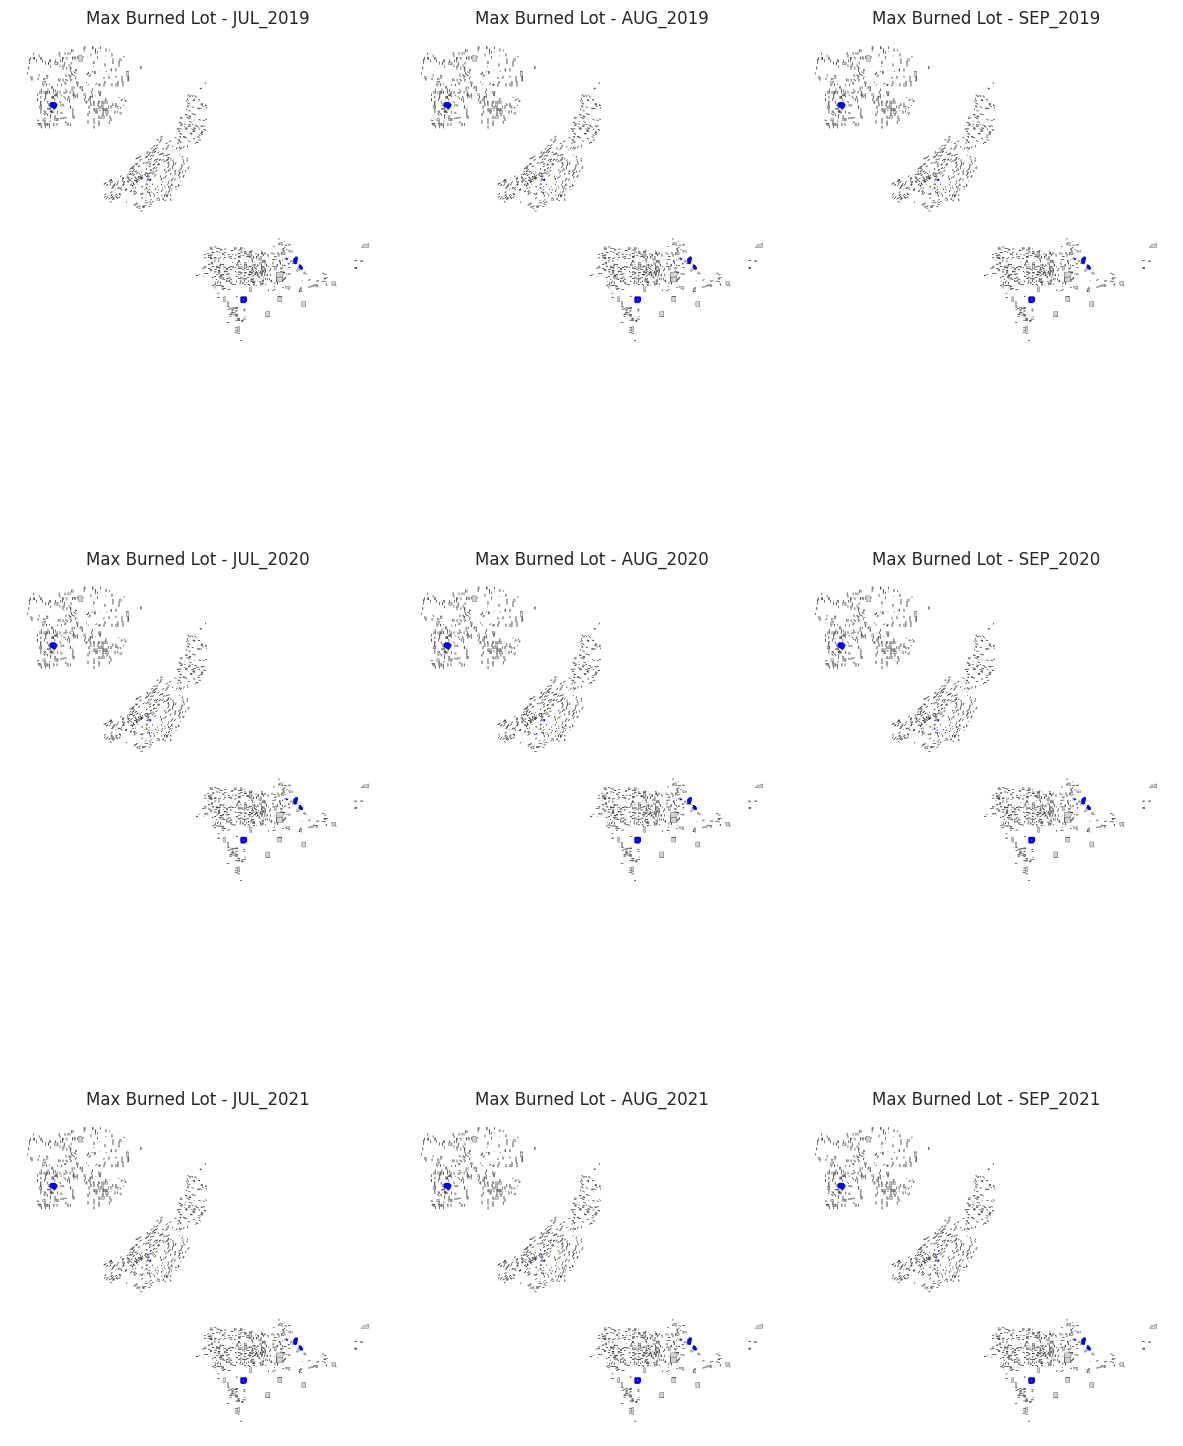

In [ ]:

# Define the monthly columns for each plot
monthly_columns = ['JUL_2019', 'AUG_2019', 'SEP_2019', 'JUL_2020', 'AUG_2020', 'SEP_2020', 'JUL_2021', 'AUG_2021', 'SEP_2021']

# Create an empty GeoDataFrame to store the lot with the maximum burned area for each month
max_burned_lots = gpd.GeoDataFrame(columns=gdf.columns)

# Loop through each month_year
for month_year in monthly_columns:
    # Find the lot with the maximum burned area for the current month_year
    max_lot_idx = gdf[month_year].idxmax()
    max_burned_lot = gdf.loc[max_lot_idx]

    # Append the maximum burned lot to the GeoDataFrame
    max_burned_lots = max_burned_lots.append(max_burned_lot)

# Plot the geometry of the lots with the maximum burned area and highlight their boundaries
fig, axs = plt.subplots(3, 3, figsize=(12, 18))
fig.subplots_adjust(wspace=0.1, hspace=0.1)
for i, month_year in enumerate(monthly_columns):
    plt.subplot(3, 3, i + 1)
    gdf.plot(ax=plt.gca(), color='lightgray', edgecolor='k', linewidth=0.2)
    max_burned_lots.plot(ax=plt.gca(), color='red', alpha=0.7, markersize=100)
    max_burned_lots.boundary.plot(ax=plt.gca(), color='blue', linewidth=2)
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

    plt.title(f'Max Burned Lot - {month_year}')
    plt.axis('off')

plt.tight_layout()
plt.show()

#**Create the dummy dataset**

In [ ]:
gdf_all = gpd.read_file('/content/drive/MyDrive/PROJETOS/Project_NCF_burn_exports/Data_to_share_CSV_SHP_Read-me/Burned_area_per_lot_ALL_lots.gpkg', layer = 'Burned_area_per_lot_ALL_lots').to_crs(epsg=4326)
columns_to_suffix = [
    'AUG_2019', 'AUG_2020', 'AUG_2021',
    'JUL_2019', 'JUL_2020', 'JUL_2021',
    'SEP_2019', 'SEP_2020', 'SEP_2021',
    'Total'
]

column_mapping = {col: col + '_area' for col in columns_to_suffix}

# Rename the columns with the desired suffix
gdf_all = gdf_all.rename(columns=column_mapping)
gdf_all

LotID  Interview  LotIDCorre     LotID_fin         responseid  \
0        70039          1      700390  3.002880e+10  R_6VjZ6u5uqzVL5C4   
1        70040          2      700400  3.002880e+10  R_bn5JUGwAsorFA5j   
2        70048          1      700480  3.002880e+10  R_9t9CoDDomhP2Mnh   
3        70085          2      700850  3.002880e+10  R_mlhGs35Qi3QqSOj   
4        70089          1      700890  3.002880e+10  R_2F4HJfRHQ6wMRSs   
...        ...        ...         ...           ...                ...   
23231  1504771          0           0  1.014010e+10                NaN   
23232  1506571          0           0  1.014011e+10                NaN   
23233  1507301          0           0  1.014011e+10                NaN   
23234  1406781          0           0  1.006011e+10                NaN   
23235  1500291          0           0  1.014012e+10                NaN   

        Shape_Leng    Shape_Area  AUG_2019_area  AUG_2020_area  AUG_2021_area  \
0      4472.852462  4.910093e+05            NaN            NaN            NaN   
1      3968.138900  5.220206e+05            NaN            NaN            NaN   
2      4939.581286  9.655920e+05            NaN            NaN            NaN   
3      6047.022054  2.028331e+06            NaN            NaN            NaN   
4      4958.625546  9.815222e+05            NaN            NaN            NaN   
...            ...           ...            ...            ...            ...   
23231  4673.712748  5.586625e+05            NaN            NaN            NaN   
23232  3246.046772  4.114892e+05            NaN            NaN            NaN   
23233  5219.486665  2.924943e+05            NaN            NaN            NaN   
23234  5243.801922  4.723632e+05            NaN            NaN            NaN   
23235  5418.497052  5.800838e+05            NaN            NaN            NaN   

       JUL_2019_area  JUL_2020_area  JUL_2021_area  SEP_2019_area  \
0                NaN            NaN            NaN            NaN   
1                NaN            NaN            NaN            NaN   
2                NaN            NaN            NaN            NaN   
3                NaN            NaN            NaN            NaN   
4                NaN            NaN            NaN            NaN   
...              ...            ...            ...            ...   
23231            NaN            NaN            NaN        0.11738   
23232            NaN            NaN            NaN            NaN   
23233            NaN            NaN            NaN            NaN   
23234            NaN            NaN            NaN            NaN   
23235            NaN            NaN            NaN            NaN   

       SEP_2020_area  SEP_2021_area  Total_area  \
0                NaN            NaN         NaN   
1                NaN            NaN         NaN   
2                NaN            NaN         NaN   
3                NaN            NaN         NaN   
4                NaN            NaN         NaN   
...              ...            ...         ...   
23231            NaN            NaN     0.11738   
23232            NaN            NaN         NaN   
23233            NaN            NaN         NaN   
23234            NaN            NaN         NaN   
23235            NaN            NaN         NaN   

                                                geometry  
0      POLYGON ((-61.88806 -11.67854, -61.88807 -11.6...  
1      POLYGON ((-61.90397 -11.68877, -61.90338 -11.6...  
2      POLYGON ((-61.92448 -11.78252, -61.90647 -11.7...  
3      POLYGON ((-61.88792 -11.60400, -61.88792 -11.6...  
4      POLYGON ((-61.92432 -11.66031, -61.90632 -11.6...  
...                                                  ...  
23231  POLYGON ((-63.22082 -10.15296, -63.22186 -10.1...  
23232  POLYGON ((-63.34550 -10.36462, -63.34549 -10.3...  
23233  POLYGON ((-63.32743 -10.25096, -63.32861 -10.2...  
23234  POLYGON ((-63.20847 -10.24963, -63.20864 -10.2...  
23235  POLYGON ((-63.40722 -10.22855, -63.40784 -10.2...

In [ ]:
import pandas as pd
gdf_all_dummy = gdf_all
columns_to_dummy = [
    'AUG_2019_area', 'AUG_2020_area', 'AUG_2021_area',
    'JUL_2019_area', 'JUL_2020_area', 'JUL_2021_area',
    'SEP_2019_area', 'SEP_2020_area', 'SEP_2021_area',
    'Total_area'
]

gdf_all_dummy[columns_to_dummy] = gdf_all_dummy[columns_to_dummy].applymap(lambda x: 1 if x > 0 else 0)

In [ ]:
gdf_all_dummy

LotID  Interview  LotIDCorre     LotID_fin         responseid  \
0        70039          1      700390  3.002880e+10  R_6VjZ6u5uqzVL5C4   
1        70040          2      700400  3.002880e+10  R_bn5JUGwAsorFA5j   
2        70048          1      700480  3.002880e+10  R_9t9CoDDomhP2Mnh   
3        70085          2      700850  3.002880e+10  R_mlhGs35Qi3QqSOj   
4        70089          1      700890  3.002880e+10  R_2F4HJfRHQ6wMRSs   
...        ...        ...         ...           ...                ...   
23231  1504771          0           0  1.014010e+10                NaN   
23232  1506571          0           0  1.014011e+10                NaN   
23233  1507301          0           0  1.014011e+10                NaN   
23234  1406781          0           0  1.006011e+10                NaN   
23235  1500291          0           0  1.014012e+10                NaN   

        Shape_Leng    Shape_Area  AUG_2019_area  AUG_2020_area  AUG_2021_area  \
0      4472.852462  4.910093e+05              0              0              0   
1      3968.138900  5.220206e+05              0              0              0   
2      4939.581286  9.655920e+05              0              0              0   
3      6047.022054  2.028331e+06              0              0              0   
4      4958.625546  9.815222e+05              0              0              0   
...            ...           ...            ...            ...            ...   
23231  4673.712748  5.586625e+05              0              0              0   
23232  3246.046772  4.114892e+05              0              0              0   
23233  5219.486665  2.924943e+05              0              0              0   
23234  5243.801922  4.723632e+05              0              0              0   
23235  5418.497052  5.800838e+05              0              0              0   

       JUL_2019_area  JUL_2020_area  JUL_2021_area  SEP_2019_area  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
23231              0              0              0              1   
23232              0              0              0              0   
23233              0              0              0              0   
23234              0              0              0              0   
23235              0              0              0              0   

       SEP_2020_area  SEP_2021_area  Total_area  \
0                  0              0           0   
1                  0              0           0   
2                  0              0           0   
3                  0              0           0   
4                  0              0           0   
...              ...            ...         ...   
23231              0              0           1   
23232              0              0           0   
23233              0              0           0   
23234              0              0           0   
23235              0              0           0   

                                                geometry  
0      POLYGON ((-61.88806 -11.67854, -61.88807 -11.6...  
1      POLYGON ((-61.90397 -11.68877, -61.90338 -11.6...  
2      POLYGON ((-61.92448 -11.78252, -61.90647 -11.7...  
3      POLYGON ((-61.88792 -11.60400, -61.88792 -11.6...  
4      POLYGON ((-61.92432 -11.66031, -61.90632 -11.6...  
...                                                  ...  
23231  POLYGON ((-63.22082 -10.15296, -63.22186 -10.1...  
23232  POLYGON ((-63.34550 -10.36462, -63.34549 -10.3...  
23233  POLYGON ((-63.32743 -10.25096, -63.32861 -10.2...  
23234  POLYGON ((-63.20847 -10.24963, -63.20864 -10.2...  
23235  POLYGON ((-63.40722 -10.22855, -63.40784 -10.2...

In [ ]:
# Columns with the "area" suffix
columns_with_area_suffix = [
    'AUG_2019_area', 'AUG_2020_area', 'AUG_2021_area',
    'JUL_2019_area', 'JUL_2020_area', 'JUL_2021_area',
    'SEP_2019_area', 'SEP_2020_area', 'SEP_2021_area',
    'Total_area'
]

# Suffix to replace
old_suffix = '_area'
new_suffix = '_dummy'

# Create a mapping dictionary to replace the old suffix with the new one
column_mapping = {col: col.replace(old_suffix, new_suffix) for col in columns_with_area_suffix}

# Rename the columns with the updated suffix
gdf_all_dummy = gdf_all_dummy.rename(columns=column_mapping)
gdf_all_dummy = gdf_all_dummy.drop(columns = ['Interview',
 'LotIDCorre',
 'LotID_fin',
 'responseid',
 'Shape_Leng',
 'Shape_Area','geometry'])
gdf_all_dummy

merged = pd.merge(gdf_all_dummy, gdf_all, on = 'LotID')
merged.columns.tolist()

['LotID',
 'AUG_2019_dummy',
 'AUG_2020_dummy',
 'AUG_2021_dummy',
 'JUL_2019_dummy',
 'JUL_2020_dummy',
 'JUL_2021_dummy',
 'SEP_2019_dummy',
 'SEP_2020_dummy',
 'SEP_2021_dummy',
 'Total_dummy',
 'Interview',
 'LotIDCorre',
 'LotID_fin',
 'responseid',
 'Shape_Leng',
 'Shape_Area',
 'AUG_2019_area',
 'AUG_2020_area',
 'AUG_2021_area',
 'JUL_2019_area',
 'JUL_2020_area',
 'JUL_2021_area',
 'SEP_2019_area',
 'SEP_2020_area',
 'SEP_2021_area',
 'Total_area',
 'geometry']

In [ ]:
merged = gpd.GeoDataFrame(merged)

In [ ]:
merged.to_csv('/content/drive/MyDrive/PROJETOS/Project_NCF_burn_exports/Data_to_share_CSV_SHP_Read-me/Burned_area_in_ha_Dummy_per_lot_ALL_LOTS.csv')
merged.to_file('/content/drive/MyDrive/PROJETOS/Project_NCF_burn_exports/Data_to_share_CSV_SHP_Read-me/Burned_area_in_ha_Dummy_per_lot_ALL_LOTS.gpkg')

In [ ]:
df_dummy = pd.read_csv('/content/drive/MyDrive/PROJETOS/Project_NCF_burn_exports/Data_to_share_CSV_SHP_Read-me/Burned_area_in_ha_Dummy_per_lot_ALL_LOTS.csv')
df_dummy

Jime correlation

In [11]:
import pandas as pd
df_fire = gpd.read_file('/content/drive/MyDrive/PROJETOS/Project_NCF_burn_exports/Data_to_share_CSV_SHP_Read-me/Burned_area_in_ha_Dummy_per_lot_ALL_LOTS.gpkg').to_crs(epsg=4326)
df_dem = pd.read_csv('/content/drive/MyDrive/PROJETOS/Jime_data/DEM_variables_2019_lots.csv')
df_slope = pd.read_csv('/content/drive/MyDrive/PROJETOS/Jime_data/Slope_variables_2019_lots.csv')

In [13]:
df_fire = df_fire.reindex(['LotID',
 'Interview',
 'LotIDCorre',
 'LotID_fin',
 'responseid',
 'Shape_Leng',
 'Shape_Area',
 'AUG_2019_area',
 'AUG_2020_area',
 'AUG_2021_area',
 'JUL_2019_area',
 'JUL_2020_area',
 'JUL_2021_area',
 'SEP_2019_area',
 'SEP_2020_area',
 'SEP_2021_area',
 'Total_area',
 'AUG_2019_dummy',
 'AUG_2020_dummy',
 'AUG_2021_dummy',
 'JUL_2019_dummy',
 'JUL_2020_dummy',
 'JUL_2021_dummy',
 'SEP_2019_dummy',
 'SEP_2020_dummy',
 'SEP_2021_dummy',
 'Total_dummy',
 'geometry'],  axis=1)

In [14]:
df_fire.columns.tolist()

['LotID',
 'Interview',
 'LotIDCorre',
 'LotID_fin',
 'responseid',
 'Shape_Leng',
 'Shape_Area',
 'AUG_2019_area',
 'AUG_2020_area',
 'AUG_2021_area',
 'JUL_2019_area',
 'JUL_2020_area',
 'JUL_2021_area',
 'SEP_2019_area',
 'SEP_2020_area',
 'SEP_2021_area',
 'Total_area',
 'AUG_2019_dummy',
 'AUG_2020_dummy',
 'AUG_2021_dummy',
 'JUL_2019_dummy',
 'JUL_2020_dummy',
 'JUL_2021_dummy',
 'SEP_2019_dummy',
 'SEP_2020_dummy',
 'SEP_2021_dummy',
 'Total_dummy',
 'geometry']

In [ ]:
# df_fire.to_file('/content/drive/MyDrive/PROJETOS/Project_NCF_burn_exports/Data_to_share_CSV_SHP_Read-me/Burned_area_in_ha_Dummy_per_lot_ALL_LOTS.gpkg')
# df_fire.to_csv('/content/drive/MyDrive/PROJETOS/Project_NCF_burn_exports/Data_to_share_CSV_SHP_Read-me/Burned_area_in_ha_Dummy_per_lot_ALL_LOTS.csv')

In [34]:
df_fire = gpd.read_file('/content/drive/MyDrive/PROJETOS/Project_NCF_burn_exports/Data_to_share_CSV_SHP_Read-me/Burned_area_in_ha_Dummy_per_lot_ALL_LOTS.gpkg')
df_fire

LotID  Interview  LotIDCorre     LotID_fin         responseid  \
0        70039          1      700390  3.002880e+10  R_6VjZ6u5uqzVL5C4   
1        70039          0      700391  3.002882e+10                NaN   
2        70039          1      700390  3.002880e+10  R_6VjZ6u5uqzVL5C4   
3        70039          0      700391  3.002882e+10                NaN   
4        70040          2      700400  3.002880e+10  R_bn5JUGwAsorFA5j   
...        ...        ...         ...           ...                ...   
24241  1504771          0           0  1.014010e+10                NaN   
24242  1506571          0           0  1.014011e+10                NaN   
24243  1507301          0           0  1.014011e+10                NaN   
24244  1406781          0           0  1.006011e+10                NaN   
24245  1500291          0           0  1.014012e+10                NaN   

        Shape_Leng     Shape_Area  AUG_2019_area  AUG_2020_area  \
0      4472.852462  491009.339201            NaN            NaN   
1      4470.047786  487498.989947            NaN            NaN   
2      4472.852462  491009.339201            NaN            NaN   
3      4470.047786  487498.989947            NaN            NaN   
4      3968.138900  522020.643740            NaN            NaN   
...            ...            ...            ...            ...   
24241  4673.712748  558662.500477            NaN            NaN   
24242  3246.046772  411489.228163            NaN            NaN   
24243  5219.486665  292494.317351            NaN            NaN   
24244  5243.801922  472363.242614            NaN            NaN   
24245  5418.497052  580083.765482            NaN            NaN   

       AUG_2021_area  ...  AUG_2020_dummy  AUG_2021_dummy  JUL_2019_dummy  \
0                NaN  ...               0               0               0   
1                NaN  ...               0               0               0   
2                NaN  ...               0               0               0   
3                NaN  ...               0               0               0   
4                NaN  ...               0               0               0   
...              ...  ...             ...             ...             ...   
24241            NaN  ...               0               0               0   
24242            NaN  ...               0               0               0   
24243            NaN  ...               0               0               0   
24244            NaN  ...               0               0               0   
24245            NaN  ...               0               0               0   

       JUL_2020_dummy  JUL_2021_dummy  SEP_2019_dummy  SEP_2020_dummy  \
0                   0               0               0               0   
1                   0               0               0               0   
2                   0               0               0               0   
3                   0               0               0               0   
4                   0               0               0               0   
...               ...             ...             ...             ...   
24241               0               0               1               0   
24242               0               0               0               0   
24243               0               0               0               0   
24244               0               0               0               0   
24245               0               0               0               0   

       SEP_2021_dummy  Total_dummy  \
0                   0            0   
1                   0            0   
2                   0            0   
3                   0            0   
4                   0            0   
...               ...          ...   
24241               0            1   
24242               0            0   
24243               0            0   
24244               0            0   
24245               0            0   

                                                geometry

In [35]:
df_fire = df_fire.drop(columns = ['LotID',
 'Interview',
 'LotIDCorre',
 'responseid',
 'Shape_Leng',
 'Shape_Area',]).rename(columns = {'LotID_fin':'ID'})


In [36]:
df_fire['ID'] = df_fire['ID'].astype('int')
df_fire

ID  AUG_2019_area  AUG_2020_area  AUG_2021_area  \
0      30028800400            NaN            NaN            NaN   
1      30028816980            NaN            NaN            NaN   
2      30028800400            NaN            NaN            NaN   
3      30028816980            NaN            NaN            NaN   
4      30028800410            NaN            NaN            NaN   
...            ...            ...            ...            ...   
24241  10140104381            NaN            NaN            NaN   
24242  10140105871            NaN            NaN            NaN   
24243  10140106541            NaN            NaN            NaN   
24244  10060106101            NaN            NaN            NaN   
24245  10140119260            NaN            NaN            NaN   

       JUL_2019_area  JUL_2020_area  JUL_2021_area  SEP_2019_area  \
0                NaN            NaN            NaN            NaN   
1                NaN            NaN            NaN            NaN   
2                NaN            NaN            NaN            NaN   
3                NaN            NaN            NaN            NaN   
4                NaN            NaN            NaN            NaN   
...              ...            ...            ...            ...   
24241            NaN            NaN            NaN        0.11738   
24242            NaN            NaN            NaN            NaN   
24243            NaN            NaN            NaN            NaN   
24244            NaN            NaN            NaN            NaN   
24245            NaN            NaN            NaN            NaN   

       SEP_2020_area  SEP_2021_area  ...  AUG_2020_dummy  AUG_2021_dummy  \
0                NaN            NaN  ...               0               0   
1                NaN            NaN  ...               0               0   
2                NaN            NaN  ...               0               0   
3                NaN            NaN  ...               0               0   
4                NaN            NaN  ...               0               0   
...              ...            ...  ...             ...             ...   
24241            NaN            NaN  ...               0               0   
24242            NaN            NaN  ...               0               0   
24243            NaN            NaN  ...               0               0   
24244            NaN            NaN  ...               0               0   
24245            NaN            NaN  ...               0               0   

       JUL_2019_dummy  JUL_2020_dummy  JUL_2021_dummy  SEP_2019_dummy  \
0                   0               0               0               0   
1                   0               0               0               0   
2                   0               0               0               0   
3                   0               0               0               0   
4                   0               0               0               0   
...               ...             ...             ...             ...   
24241               0               0               0               1   
24242               0               0               0               0   
24243               0               0               0               0   
24244               0               0               0               0   
24245               0               0               0               0   

       SEP_2020_dummy  SEP_2021_dummy  Total_dummy  \
0                   0               0            0   
1                   0               0            0   
2                   0               0            0   
3                   0               0            0   
4                   0               0            0   
...               ...             ...          ...   
24241               0               0            1   
24242               0               0            0   
24243               0               0            0   
24244               0               0            0  

In [37]:
lots_surveyed = df_dem.ID.tolist()

df_fire_surveyed = df_fire[df_fire['ID'].isin(lots_surveyed)]
df_fire_surveyed

ID  AUG_2019_area  AUG_2020_area  AUG_2021_area  \
0      30028800400            NaN            NaN            NaN   
2      30028800400            NaN            NaN            NaN   
4      30028800410            NaN            NaN            NaN   
6      30028800410            NaN            NaN            NaN   
8      30028800490            NaN            NaN            NaN   
...            ...            ...            ...            ...   
23079  10060113090            NaN            NaN            NaN   
23080  10140119180            NaN            NaN            NaN   
23081  10140119210       3.976861            NaN            NaN   
23082  10140119240            NaN            NaN            NaN   
23083  10140119250            NaN            NaN            NaN   

       JUL_2019_area  JUL_2020_area  JUL_2021_area  SEP_2019_area  \
0                NaN            NaN            NaN            NaN   
2                NaN            NaN            NaN            NaN   
4                NaN            NaN            NaN            NaN   
6                NaN            NaN            NaN            NaN   
8                NaN            NaN            NaN            NaN   
...              ...            ...            ...            ...   
23079            NaN            NaN            NaN            NaN   
23080            NaN            NaN            NaN            NaN   
23081            NaN            NaN            NaN       4.270012   
23082            NaN            NaN            NaN            NaN   
23083            NaN            NaN            NaN            NaN   

       SEP_2020_area  SEP_2021_area  ...  AUG_2020_dummy  AUG_2021_dummy  \
0                NaN            NaN  ...               0               0   
2                NaN            NaN  ...               0               0   
4                NaN            NaN  ...               0               0   
6                NaN            NaN  ...               0               0   
8                NaN            NaN  ...               0               0   
...              ...            ...  ...             ...             ...   
23079            NaN            NaN  ...               0               0   
23080      21.378460            NaN  ...               0               0   
23081            NaN            NaN  ...               0               0   
23082            NaN            NaN  ...               0               0   
23083       0.391397            NaN  ...               0               0   

       JUL_2019_dummy  JUL_2020_dummy  JUL_2021_dummy  SEP_2019_dummy  \
0                   0               0               0               0   
2                   0               0               0               0   
4                   0               0               0               0   
6                   0               0               0               0   
8                   0               0               0               0   
...               ...             ...             ...             ...   
23079               0               0               0               0   
23080               0               0               0               0   
23081               0               0               0               1   
23082               0               0               0               0   
23083               0               0               0               0   

       SEP_2020_dummy  SEP_2021_dummy  Total_dummy  \
0                   0               0            0   
2                   0               0            0   
4                   0               0            0   
6                   0               0            0   
8                   0               0            0   
...               ...             ...          ...   
23079               0               0            0   
23080               1               0            1   
23081               0               0            1   
23082               0               0            0  

In [38]:
df_merge_1 = pd.merge(df_slope, df_dem, on='ID')
df_merge_1

ID  FREQUENCY_x  MEAN_slope  MIN_slope  MAX_slope  RANGE_slope  \
0     10002300420          502        3.39          0         12           12   
1     10002300640          521        3.80          0         15           15   
2     10002300720          534        4.54          0         14           14   
3     10002302400          311        3.83          0         14           14   
4     10002302570          396       12.07          0         29           29   
...           ...          ...         ...        ...        ...          ...   
1338  30148407770           59        3.07          0         10           10   
1339  30148407800          142        3.27          0         11           11   
1340  30148407810           52        2.94          0          8            8   
1341  30148407820           41        2.85          0          7            7   
1342  30148407840           82        3.41          0          9            9   

      STD_slope  VARIANCE_slope  FREQUENCY_y  MEAN_gridc  MIN_gridco  \
0          2.24            5.03          521      138.12         117   
1          3.21           10.33          566      144.00         123   
2          3.16           10.02          489      144.64         132   
3          3.19           10.18          309      140.08         126   
4          6.48           41.93          490      251.68         162   
...         ...             ...          ...         ...         ...   
1338       2.30            5.31           67      255.12         243   
1339       2.50            6.25          128      250.44         234   
1340       1.76            3.11           58      238.07         229   
1341       1.67            2.78           46      250.63         243   
1342       2.22            4.94           97      261.58         251   

      MAX_gridco  RANGE_grid  STD_gridco  VARIANCE_g  
0            157          40       10.31      106.29  
1            164          41        9.07       82.25  
2            160          28        6.93       48.01  
3            159          33        7.30       53.22  
4            313         151       37.73     1423.42  
...          ...         ...         ...         ...  
1338         266          23        6.77       45.83  
1339         261          27        6.80       46.25  
1340         247          18        4.77       22.73  
1341         258          15        4.01       16.10  
1342         274          23        4.67       21.83  

[1343 rows x 15 columns]

In [ ]:
df_merge_DEM_SLOPE_FIRE = pd.merge(df_merge_1, df_fire, on= 'ID')
df_merge_DEM_SLOPE_FIRE

In [ ]:
corr_matrix = df_merge_DEM_SLOPE_FIRE.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()